# Time Series Forescasting
 
 #Loading Data from CSV file

    The Pandas library in Python provides excellent, built-in support for time series data.
    Pandas represents time series datasets as a Series.
    A Series is a one-dimensional array with a time label for each row.
    A Dataframe is a collection of series



In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

C:\Users\Admin\AppData\Local\Temp/ipykernel_12492/3130300479.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [3]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [4]:
sales.tail()

,Sales
Month,
2018-08-01,408
2018-09-01,490
2018-10-01,420
2018-11-01,520
2018-12-01,480


<AxesSubplot:xlabel='Month'>

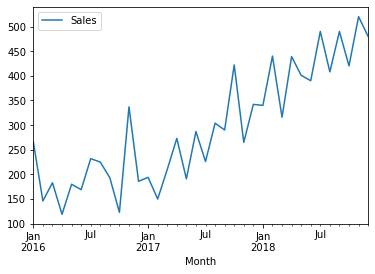

In [5]:
sales.plot()

In [7]:
#checking Stationary
from pmdarima.arima import ADFTest
adf_test =ADFTest(alpha=0.05)
adf_test.should_diff(sales)

(0.5633154889362628, True)

Stationary means mean, variance and covariance is constant over periods.

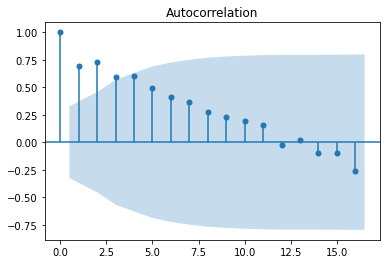

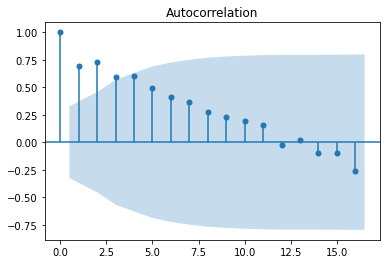

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [ ]:
#stationary is important concept of time series analysis

In [ ]:
#A stationary time series is one whose properties do not depend on the time at which the series is observed.

### Converting series to stationary

In [9]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [10]:
sales.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [11]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [12]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


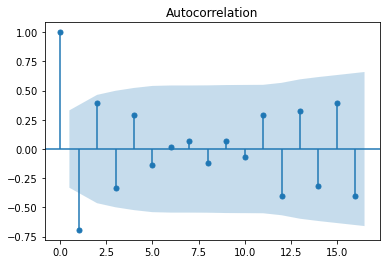

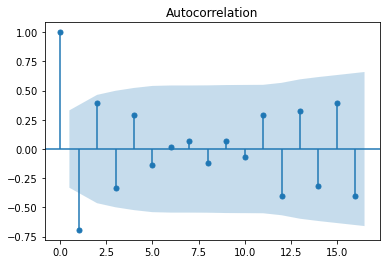

In [13]:
plot_acf(sales_diff)

<AxesSubplot:xlabel='Month'>

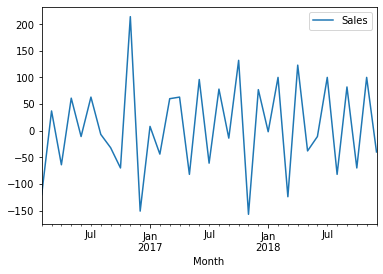

In [14]:
sales_diff.plot()

In [15]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [16]:
train.size

27

# Autoreggresive AR Model

In [ ]:
#Autoregressive (AR) models are a subset of time series models, which can be used to predict future values based on previous observations. 

In [17]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

D:\Users\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [18]:
predictions = model_ar_fit.predict(start=26,end=36)

In [19]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

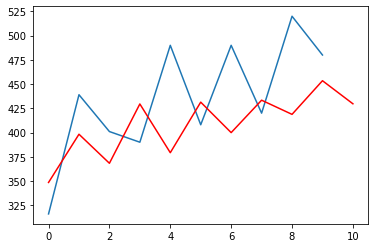

In [20]:
plt.plot(test)
plt.plot(predictions,color='red')

<AxesSubplot:xlabel='Month'>

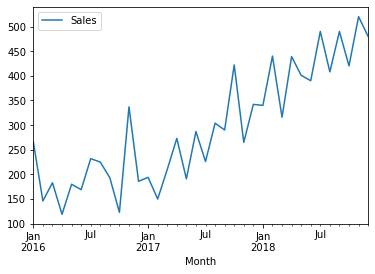

In [21]:
sales.plot()

# ARIMA model
#ARIMA stands for Auto-Regressive Integrated Moving Average.


In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

D:\Users\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


297.1619838335339


In [24]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.04303078, 355.94690226, 413.09267791, 374.50921021,
       446.93334679, 378.62595117, 406.36437111, 411.38232295,
       475.87847797, 415.38519101])

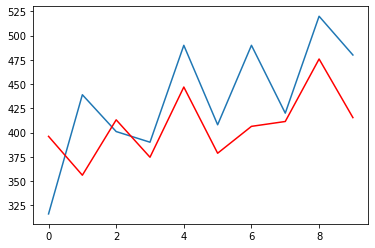

In [25]:
plt.plot(test)
plt.plot(predictions,color='red')

In [26]:
mean_squared_error(test,predictions)

2959.9437635298073

In [27]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [28]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809387858
(0, 0, 2) 315.2506002876686
(0, 0, 3) nan
(0, 0, 4) 310.1669328589044
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841529484621
(0, 1, 2) 296.32292269077936
(0, 1, 3) 298.3120211738952
(0, 1, 4) 300.3393975617954
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019462496378
(0, 2, 2) 290.3983520830236
(0, 2, 3) 292.98588426136365
(1, 0, 0) 316.16687175227673
(1, 0, 1) 313.0487174499728
(1, 0, 2) 310.97906422280414
(1, 0, 4) 309.67799311710337
(1, 1, 0) 298.83254422707944
(1, 1, 1) 297.1256511258629
(1, 1, 2) 299.47166670626365
(1, 1, 3) 301.2851180947741
(1, 1, 4) 299.9787323970369
(1, 2, 0) 306.53077675721624
(2, 0, 0) 310.99695736453157
(2, 0, 1) 338.67537294351996
(2, 1, 0) 300.2089561239993
(2, 1, 1) 297.9999930167365
(2, 1, 2) 298.5505428130234
(2, 1, 3) 302.8720828341381
(2, 2, 0) 306.29758564318274
(3, 0, 0) 312.98385874206883
(3, 0, 1) 334.25947227557987
(3, 1, 0) 294.8543584218737
(3, 1, 1) 295.9979353418428
(3, 1, 2) 292.668623